First we import the packages we'll need

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: load the dataset

Next we load the dataset from the csv

In [115]:
file_location = 'Dataset/titanic.csv'

titanic_dataframe = pd.read_csv(file_location)
titanic_dataframe.head()


,class,age,sex,survived
0,1st,29.00,female,survived
1,1st,2.00,female,died
2,1st,30.00,male,died
3,1st,25.00,female,died
4,1st,0.92,male,survived


## Step 2: Exploratory Data Analysis


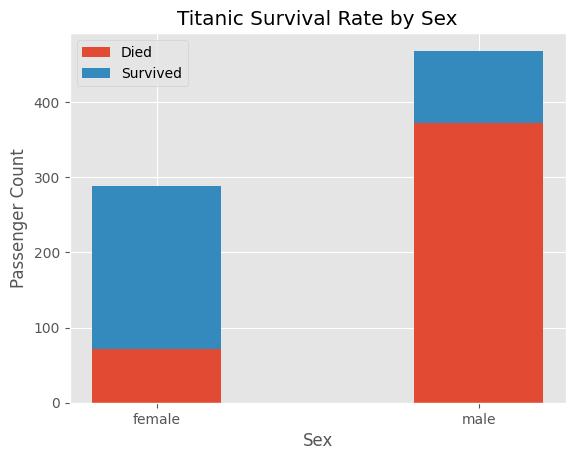

In [116]:
# Survival rate by gender

plt.style.use('ggplot')

sexes = ['female', 'male']
titanic_women = titanic_dataframe[titanic_dataframe['sex'] == 'female']
titanic_men = titanic_dataframe[titanic_dataframe['sex'] == 'male']

survived = [len(titanic_women[titanic_women['survived'] == 'survived']), len(titanic_men[titanic_men['survived'] == 'survived'])]
died = [len(titanic_women[titanic_women['survived'] == 'died']), len(titanic_men[titanic_men['survived'] == 'died'])] 

bar_width=0.4

plt.bar(sexes, died, label='Died', width=bar_width)
plt.bar(sexes, survived, label='Survived', bottom=died, width=bar_width)
plt.title('Titanic Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.grid
plt.legend()
plt.show()


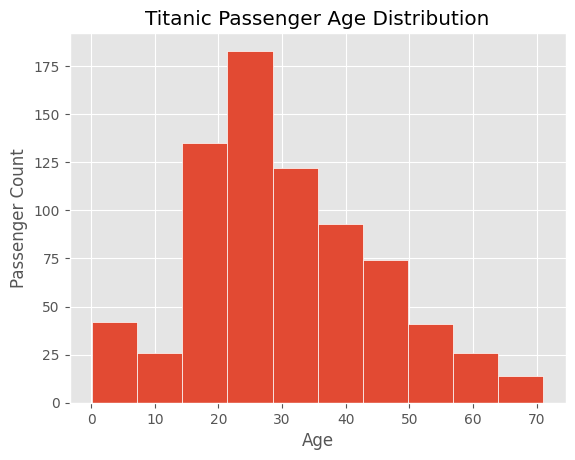

In [117]:
# Age distribution

titanic_survivors = titanic_dataframe[titanic_dataframe['survived'] == 'survived']
titanic_deaths = titanic_dataframe[titanic_dataframe['survived'] == 'died']

num_bins = 10

plt.hist(titanic_dataframe['age'], num_bins, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.title('Titanic Passenger Age Distribution')
plt.show()

# plt.hist(
#     [titanic_dataframe.loc[titanic_dataframe['survived'] == 'died', 'age'],
#     titanic_dataframe.loc[titanic_dataframe['survived'] == 'survived', 'age']
# ],
# stacked=True,
# label = ['Died','Survived'],
# edgecolor='white',
# bins=num_bins)
# plt.legend()
# plt.xlabel('Age')
# plt.ylabel('Passenger Count')
# plt.title('Titanic Survival by Age')
# plt.show()

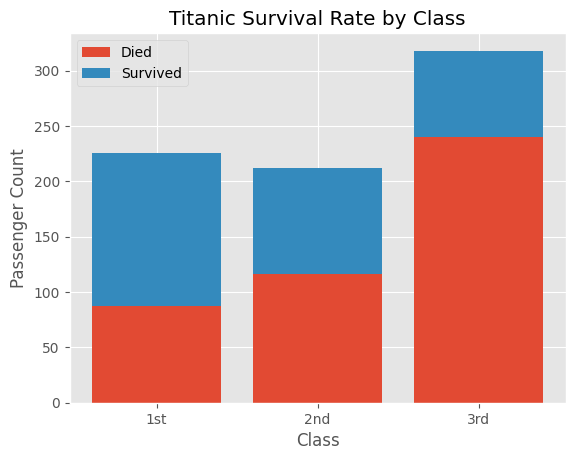

In [118]:
# Survival by class

classes = ['1st', '2nd', '3rd']
died_by_class = []
survived_by_class = []

for class_name in classes:
    died_by_class.append(len(titanic_dataframe[(titanic_dataframe['class'] == class_name) & (titanic_dataframe['survived'] == 'died')]))
    survived_by_class.append(len(titanic_dataframe[(titanic_dataframe['class'] == class_name) & (titanic_dataframe['survived'] == 'survived')]))

plt.bar(classes, died_by_class, label='Died')
plt.bar(classes, survived_by_class, label='Survived',bottom=died_by_class)

plt.title('Titanic Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Passenger Count')
plt.grid
plt.legend()
plt.show()

### 3. Visualizing Age Distribution by Survival Status

#### 3.1 Histograms for Age Distribution

Create histograms to compare the age distributions of survivors and non-survivors.

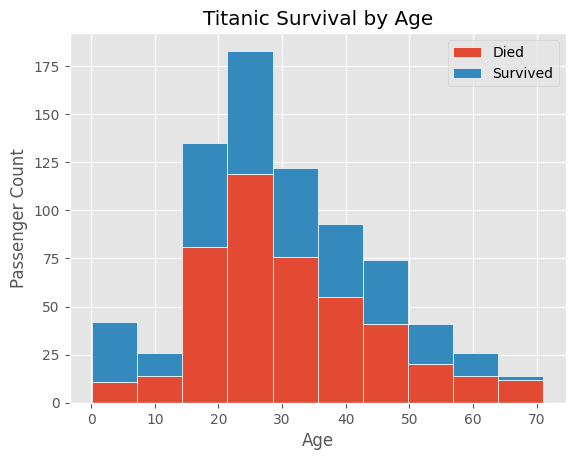

In [119]:
# histogram of age of survivors

titanic_survivors = titanic_dataframe[titanic_dataframe['survived'] == 'survived']
titanic_nonsurvivors = titanic_dataframe[titanic_dataframe['survived'] == 'died']

plt.hist([titanic_nonsurvivors['age'],titanic_survivors['age']],
    stacked=True,
    label = ['Died','Survived'],
    edgecolor='white',
    bins=num_bins)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.title('Titanic Survival by Age')
plt.show()


#### 3.2 Pyramid-style Age Distribution

Construct a pyramid-style plot to compare age distributions between survivors and non-survivors. This visualization will help highlight which age groups were more likely to survive.

#### 3.3 KDE Plots for Survival by Age ( for male, female and total)

- **KDE Plot for Survival by Age:**
Visualize the age distribution for survivors and non-survivors using KDE plots. This will provide a smooth estimate of the age distributions.

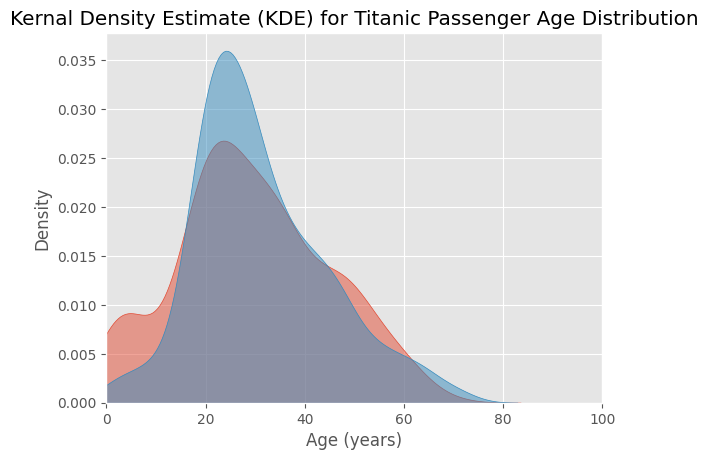

In [120]:
sns.kdeplot(titanic_survivors['age'], fill=True, alpha=0.5)
sns.kdeplot(titanic_nonsurvivors['age'], fill=True, alpha=0.5)
plt.xlim(0,100)
plt.title('Kernal Density Estimate (KDE) for Titanic Passenger Age Distribution')
plt.xlabel('Age (years)')
plt.show()

### 4. Bar Graphs for Passenger Class

#### 4.1 Bar Graph of Passenger Class

Create a bar graph to show the distribution of passengers across different classes.

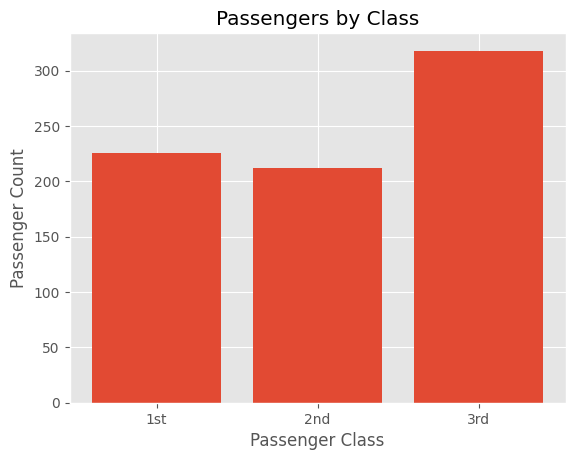

In [123]:

passenger_count_class = list(titanic_dataframe.groupby('class')['class'].count()))

plt.bar(classes, passenger_count_class)
plt.title('Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.show()

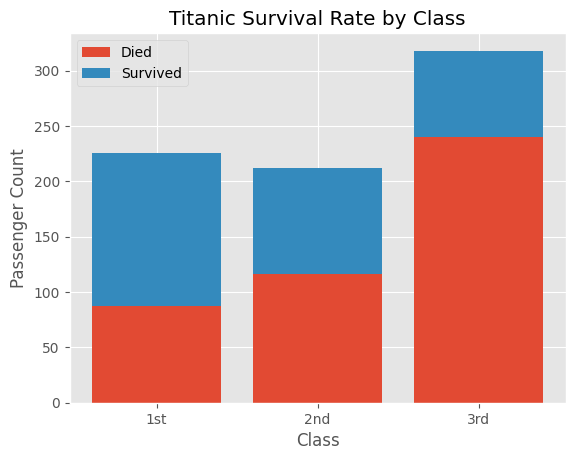

In [124]:
died_by_class = []
survived_by_class = []

for class_name in classes:
    died_by_class.append(len(titanic_dataframe[(titanic_dataframe['class'] == class_name) & (titanic_dataframe['survived'] == 'died')]))
    survived_by_class.append(len(titanic_dataframe[(titanic_dataframe['class'] == class_name) & (titanic_dataframe['survived'] == 'survived')]))

plt.bar(classes, died_by_class, label='Died')
plt.bar(classes, survived_by_class, label='Survived',bottom=died_by_class)

plt.title('Titanic Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Passenger Count')
plt.grid
plt.legend()
plt.show()